In [2]:
%matplotlib inline
%run 'B5GroupAssignment.py'

It took 1815.3226988315582 seconds.


In [1]:
import time
start = time.time()
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
RawData = pd.read_csv('data.csv',header = 0)

In [2]:
len(RawData.srch_id)

6622629

In [3]:
top5site = RawData.site_id.value_counts(sort = True,ascending=False,normalize=True).head(5)
site_pct = top5site
site_pct.set_value("others",1-sum(top5site))

5         0.620630
14        0.097991
15        0.062895
24        0.047529
32        0.035860
others    0.135095
dtype: float64

([<matplotlib.patches.Wedge at 0x95a6908>,
  <matplotlib.text.Text at 0x5202160>])

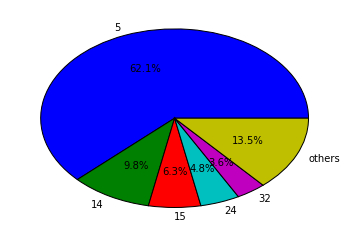

In [4]:
# which sub-websites did the click mainly come from?
# plt.bar(top10site.index,top10site)
plt.pie(site_pct,labels = site_pct.index,autopct='%1.1f%%')

In [5]:
RawData[:3]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,3105,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,6399,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,7374,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# focusing on the top 5 site_id
data = RawData.loc[RawData["site_id"].isin(top5site.index)]
cols = [c for c in data.columns if not c.startswith('comp')]
SearchData = data[cols]
SearchData[:3]

In [7]:
len(SearchData.srch_id.unique())

227835

In [8]:
#SearchData.sort(['date_time'],ascending = 1)

In [9]:
# Time range of the search data (from 2012-11-01 to 2013-06-30)
[min(SearchData['date_time']),max(SearchData['date_time'])]


['2012-11-01 00:03:24', '2013-06-30 23:55:46']

In [ ]:
Search_record = SearchData[["srch_id","date_time","site_id","visitor_location_country_id","visitor_hist_starrating","visitor_hist_adr_usd"]].drop_duplicates()

In [11]:
#Search_record.sort(['date_time'],ascending = 1)

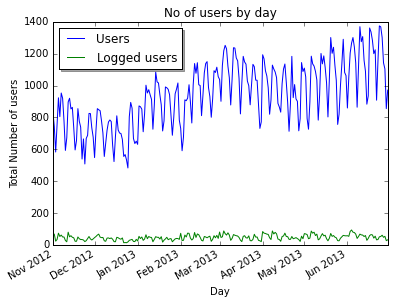

In [12]:
s = pd.to_datetime(Search_record['date_time'])
Search_record['date_time'] = s.map(lambda x: x.strftime('%Y-%m-%d'))
Search_record = Search_record.sort(['date_time'],ascending=1)
Search_record.set_index(['date_time']);
search_count = Search_record.groupby('date_time').count()
search_count.index = pd.to_datetime(search_count.index)
user_count = search_count.sort_index()
user_count['no_of_users'] = user_count['srch_id']
user_count['no_of_logged users'] = user_count[['visitor_hist_starrating','visitor_hist_adr_usd']].max(axis=1)
plt.plot(user_count.index,user_count['no_of_users'],label = 'Users')
plt.plot(user_count.index,user_count['no_of_logged users'],label = 'Logged users')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
legend = plt.legend(loc='upper left', shadow=True)
plt.xlabel('Day')
plt.ylabel('Total Number of users')
plt.title('No of users by day')

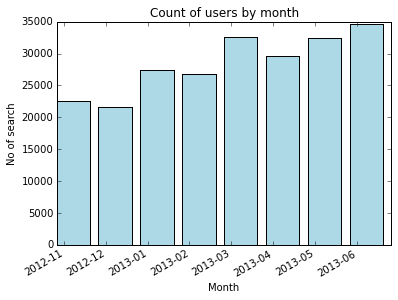

In [13]:
Search_by_month = Search_record
s = pd.to_datetime(Search_by_month['date_time'])
Search_by_month['date_time'] = s.map(lambda x: x.strftime('%Y-%m'))
Search_by_month = Search_by_month.sort(['date_time'],ascending=1)
Search_by_month.set_index(['date_time']);
count_by_month = Search_by_month.groupby('date_time').count()
count_by_month['no_of_users'] = count_by_month['srch_id']
count_by_month['no_of_logged users'] = count_by_month[['visitor_hist_starrating','visitor_hist_adr_usd']].max(axis=1)
import numpy as np
ind = np.arange(len(count_by_month['no_of_users']))
width = .35
plt.bar(ind, count_by_month['no_of_users'],color = 'lightblue')
plt.xticks(ind + width / 2, count_by_month.index)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.xlabel('Month')
plt.ylabel('No of search')
plt.title('Count of users by month')

In [14]:
# extact users with histstar
Star_preference = SearchData[np.isfinite(SearchData['visitor_hist_starrating'])]
Star_preference = Star_preference[["srch_id","date_time","site_id","visitor_location_country_id","visitor_hist_starrating","visitor_hist_adr_usd"]].drop_duplicates()
# the average star preference for frequent users
Star_preference['visitor_hist_starrating'].mean()

3.3112211192128655

In [15]:
# extract users with hist price
Price_preference = SearchData[np.isfinite(SearchData['visitor_hist_adr_usd'])]
Price_preference = Price_preference[["srch_id","date_time","site_id","visitor_location_country_id","visitor_hist_starrating","visitor_hist_adr_usd"]].drop_duplicates()
# the average price for frequent users
Price_preference['visitor_hist_adr_usd'].mean()

174.45617002705822

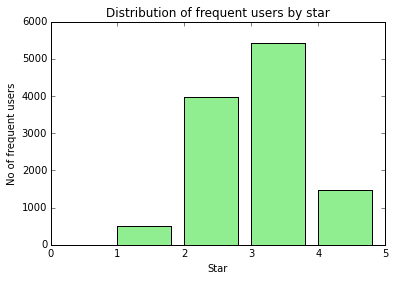

In [16]:
data = Star_preference.visitor_hist_starrating.value_counts(bins=[0,1,2,3,4,5])
plt.bar(data.index,data,color = 'lightgreen')
plt.xlabel('Star')
plt.ylabel('No of frequent users')
plt.title('Distribution of frequent users by star')

In [ ]:
# description table of preferred star and price by frequent users
Price_preference[['visitor_hist_starrating','visitor_hist_adr_usd']].describe()

In [ ]:
print('It took', time.time()-start, 'seconds.')